### Descriptive statistics on mortality at Russia

Dataset **deaths.csv** contains absolute number of deaths by Russian region, which are based on death registration information collected by the State Statistic Servise, count all age group and any cauce of deaths for 2015 to 2020 period




In [1]:
# Nessesary imports
import matplotlib.pyplot as plt
import pandas as pd

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10, 5)
pd.plotting.register_matplotlib_converters()

In [15]:
# Load the data file
data = pd.read_csv('../data/deaths.csv', parse_dates=True, index_col='period')
data.tail(5)

,territory,id_indicator,territory.ccube.0,territory.ccube.1,territory.ccube.2,territory.ccube.attr.0,value
period,,,,,,,
2020-02-28,10000000,819,Российская Федерация,Дальневосточный федеральный округ,Амурская область,3,803
2020-02-28,44000000,819,Российская Федерация,Дальневосточный федеральный округ,Магаданская область,3,104
2020-02-28,64000000,819,Российская Федерация,Дальневосточный федеральный округ,Сахалинская область,3,460
2020-02-28,99000000,819,Российская Федерация,Дальневосточный федеральный округ,Еврейская автономная область,3,172
2020-02-28,77000000,819,Российская Федерация,Дальневосточный федеральный округ,Чукотский автономный округ,3,31


In [16]:
# Removing redundant and renaming columns
data.drop(columns=['territory',  'id_indicator', 'territory.ccube.0','territory.ccube.attr.0'], inplace=True)
data.rename(columns={'territory.ccube.1':'district', 'territory.ccube.2':'subject', 'value':'deaths'}, inplace=True)
data.tail(5)

,district,subject,deaths
period,,,
2020-02-28,Дальневосточный федеральный округ,Амурская область,803
2020-02-28,Дальневосточный федеральный округ,Магаданская область,104
2020-02-28,Дальневосточный федеральный округ,Сахалинская область,460
2020-02-28,Дальневосточный федеральный округ,Еврейская автономная область,172
2020-02-28,Дальневосточный федеральный округ,Чукотский автономный округ,31


In [156]:
# Convert the index to PeriodIndex instead of DateTimeIndex
# since the number of deaths is per period, not per point in time, 
# then group by month, district and subject
deaths = data.set_index(data.index.to_period('M')).groupby([pd.Grouper(freq='M'), 'district','subject']).sum()
deaths


deaths
period  district                          subject                             
2015-01 Дальневосточный федеральный округ Амурская область                1058
                                          Еврейская автономная область     206
                                          Забайкальский край              1328
                                          Камчатский край                  318
                                          Магаданская область              144
...                                                                        ...
2020-12 Южный федеральный округ           Республика Адыгея                786
                                          Республика Калмыкия              334
                                          Республика Крым                 3851
                                          Ростовская область              7149
                                          Севастополь                      809

[6120 rows x 1 columns]

<AxesSubplot:xlabel='period'>

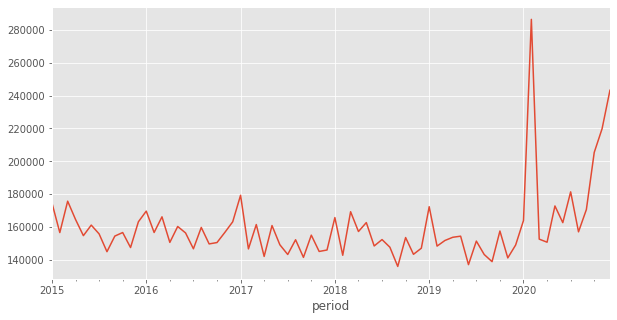

In [158]:
deaths.groupby(['period']).sum().plot(legend=None)

The plot shows the total number of number of death on all country at 2015 to 2020.<br><br>
At first glance, first and end 2020 include spikes in the data: over __280,000__ deaths in start 2020 and over __240,000__ in end! <br>
This trend might be a bit clearer if we use a average: for each month 2020 we'll take the average at this month for 5-year period :

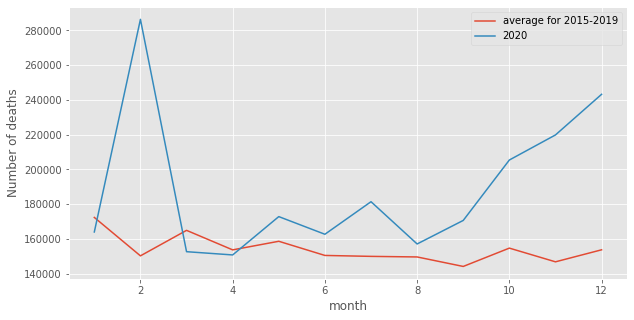

In [163]:
deaths['month'] = deaths.index.get_level_values(0).month
average = deaths.loc[:pd.Period('2019-12')].groupby('month').sum()
average['deaths'] = average['deaths']/5
ax = average.join(
    deaths.loc[pd.Period('2020-01'):].groupby('month').sum(),
    how='inner',
    lsuffix='_l', 
    rsuffix='_r'
).plot(ylabel = 'Number of deaths')
ax.legend(['average for 2015-2019','2020']);